In [41]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image, ImageDraw

In [53]:
import time
import cv2
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
!which pip

In [ ]:
!pip3 install accelerate

In [ ]:
!pip install pyvips-binary

In [ ]:
!{sys.executable} -m pip install --upgrade accelerate

In [ ]:
import sys
print(sys.executable)
!pip show accelerate

In [ ]:
import transformers, accelerate
print(transformers.__version__)
print(accelerate.__version__)

In [2]:
model = AutoModelForCausalLM.from_pretrained(
    "vikhyatk/moondream2",
    revision="2025-06-21",
    trust_remote_code=True,
    device_map="auto", 
    
)

model.safetensors:   0%|          | 0.00/3.85G [00:00<?, ?B/s]

  2025-09-08T12:30:55.788790Z  WARN  Reqwest(reqwest::Error { kind: Request, url: "https://cas-server.xethub.hf.co/reconstruction/3e0d11ed73abe7f72ea94447d92f5757285154cfd8588540e99fc1d3c9f25079", source: hyper_util::client::legacy::Error(SendRequest, hyper::Error(Io, Os { code: 110, kind: TimedOut, message: "Connection timed out" })) }). Retrying...
    at /home/runner/work/xet-core/xet-core/cas_client/src/http_client.rs:226

  2025-09-08T12:30:55.788905Z  WARN  Retry attempt #0. Sleeping 1.411456947s before the next attempt
    at /root/.cargo/registry/src/index.crates.io-1949cf8c6b5b557f/reqwest-retry-0.7.0/src/middleware.rs:171

  2025-09-08T12:33:13.978344Z  WARN  Reqwest(reqwest::Error { kind: Request, url: "https://transfer.xethub.hf.co/xorbs/default/6d05bc86e5e2abacd5f0ef9db2b750af2cfae5afc4ea797f546621e7a7ac6a91?X-Xet-Signed-Range=bytes%3D0-67042630&Expires=1757338306&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly90cmFuc2Zlci54ZXRodWIuaGYuY28veG9yYnMvZGVmYXVsdC82ZDA1YmM

tokenizer.json: 0.00B [00:00, ?B/s]

generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

In [5]:
!pwd

/home/opencv/vlm-bench/hface


In [6]:
img = Image.open("../tasks/bird.jpg")

### 1. Short Caption

In [10]:
print('Short caption:')
t1 = time.time()
print(model.caption(img, length="short")["caption"])
t2 = time.time()
diff = t2 - t1
print(f"Total time taken : {round(diff,2)}")

Short caption:
A hummingbird hovers near a red and orange flower, its wings blurred in motion, while another flower stands out in the background.
Total time taken : 2.97


### 2. Normal Caption

In [21]:
print('Normal caption:')
t1 = time.time()
normal_caption = model.caption(img, length="normal")["caption"]

for t in normal_caption:
    print(t, end="", flush=True)
t2 = time.time()
diff = t2 - t1
print(f"\nGnenerative Caption Time : {round(diff,2)}")

t3 = time.time()
print(model.caption(img, length="normal"))
t4 = time.time()
print("\nDifference of Direct Caption: ", round(t4-t3, 2))

Normal caption:
A hummingbird, a small bird known for its rapid wing beats, is near a tall, vibrant orange flower that resembles a aloe vera. The flower has multiple red and orange bracts, or modified leaves, that extend downwards. The hummingbird is near this flower, but it's not clear if it's feeding on the flower's nectar. The background of the image is softly blurred, and features a mix of yellow, green, and beige/cream hues, suggesting an outdoor setting. A second, similar orange flower is visible in the background. The hummingbird has a gray-green and reddish-brown body, and a dark, possibly black, beak.
Gnenerative Caption Time : 8.78
{'caption': "A hummingbird, a small bird known for its rapid wing beats, is near a tall, vibrant orange flower that resembles a aloe vera. The flower has multiple red and orange bracts, or modified leaves, that extend downwards. The hummingbird is near this flower, but it's not clear if it's feeding on the flower's nectar. The background of the ima

### 3. Long Caption

In [22]:
print('Long caption:')
t1 = time.time()
long_caption = model.caption(img, length="long")["caption"]

for t in long_caption:
    print(t, end="", flush=True)
t2 = time.time()
diff = t2 - t1
print(f"\nGnenerative Caption Time : {round(diff,2)}")

t3 = time.time()
print(model.caption(img, length="long"))
t4 = time.time()
print("\nDifference of Direct Caption: ", round(t4-t3, 2))

Long caption:
The image captures a vibrant scene featuring a small hummingbird in mid-flight, hovering towards a strikingly colorful flower. The hummingbird has a grayish-green body with vivid green and dark green markings on its wings and tail. Its beak is long, slender, and dark colored, contrasting beautifully with its plumage. The hummingbird's wings are spread wide, capturing the essence of motion and grace.

The flower is a striking combination of orange and red hues, characterized by its numerous thin, elongated petals radiating outwards from the center. The petals appear delicate and slightly translucent, revealing the inner structure. The flower is tall and slender, reaching upwards towards the sky, emphasizing its beauty and elegance.

In the background, slightly blurred and softly colored in shades of yellow, green, and cream, additional flowers can be seen. One flower, positioned to the left, exhibits a distinct orange-red color and similar structure to the main flower, con

### 4. VQA using MoonDream - Example 1

In [27]:
# Visual Querying
qimg = Image.open('../tasks/potholes.png')
print("\nVisual query: 'How many potholes are there in the image?'")
print(model.query(qimg, "How many potholes are there in the image?")["answer"])


Visual query: 'How many potholes are there in the image?'
There is one pothole in the image.


### 5. VQA using MoonDream - Example 2

In [28]:
# Visual Querying
qimg = Image.open('../tasks/cable-trip.jpg')
print("\nVisual query: 'Why is the person falling?'")
print(model.query(qimg, "Why is the person falling?")["answer"])


Visual query: 'Why is the person falling?'
The person is falling because they have stepped on an electrical cord lying on the floor. The cord is yellow and extends across the floor, posing a potential hazard and posing a risk of electric shock if the person touches it or steps on it while walking. The person appears to be wearing work boots, which further contribute to the safety concerns. Falling in this situation requires caution and awareness to avoid accidents and ensure personal safety.


### 6. Object Detection

In [44]:
# Object Detection
imgf = Image.open('../tasks/driving-gaze.jpg')
print("\nObject detection: 'face'")
objects = model.detect(imgf, "face")["objects"]
print(f"Found {len(objects)} face(s)")
w, h = imgf.size


Object detection: 'face'
Found 1 face(s)


In [52]:
for bbox in objects:
    # Convert normalized to pixel coords
    x_min = int(bbox['x_min'] * w)
    y_min = int(bbox['y_min'] * h)
    x_max = int(bbox['x_max'] * w)
    y_max = int(bbox['y_max'] * h)

print(x_min)

171


In [50]:
# Create draw object
draw = ImageDraw.Draw(imgf)
# Loop over bboxes
for bbox in objects:
    # Convert normalized to pixel coords
    x_min = int(bbox['x_min'] * w)
    y_min = int(bbox['y_min'] * h)
    x_max = int(bbox['x_max'] * w)
    y_max = int(bbox['y_max'] * h)

    # Draw rectangle (outline only)
    draw.rectangle([x_min, y_min, x_max, y_max], outline="green", width=3)

    # Optionally add text
    draw.text((x_min, y_min - 15), "Face", fill="green")

Text(0.5, 1.0, 'Object Detected')

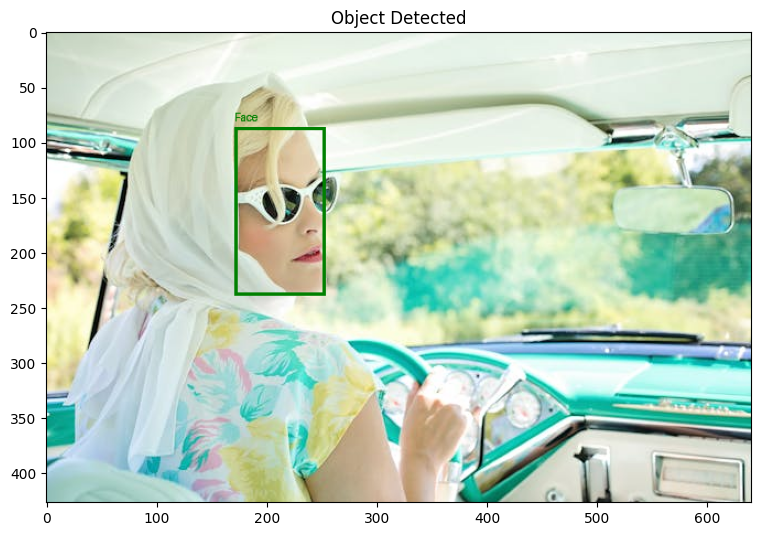

In [54]:
plt.figure(figsize = [20, 8])
plt.subplot(121); plt.imshow(imgf); plt.title('Object Detected')

In [32]:
objects

[{'x_min': 0.2678576782345772,
  'y_min': 0.20429041981697083,
  'x_max': 0.3962048217654228,
  'y_max': 0.5613345801830292}]

In [ ]:
#Captioning
print("Short caption:")
print(model.caption(image, length="short")["caption"])

print("\nNormal caption:")
for t in model.caption(image, length="normal", stream=True)["caption"]:
    # Streaming generation example, supported for caption() and detect()
    print(t, end="", flush=True)
print(model.caption(image, length="normal"))

# Visual Querying
print("\nVisual query: 'How many people are in the image?'")
print(model.query(image, "How many people are in the image?")["answer"])

# Object Detection
print("\nObject detection: 'face'")
objects = model.detect(image, "face")["objects"]
print(f"Found {len(objects)} face(s)")

# Pointing
print("\nPointing: 'person'")
points = model.point(image, "person")["points"]
print(f"Found {len(points)} person(s)")